In [ ]:
import numpy as np
from keras.models import Sequential
from keras.preprocessing import sequence
from keras.layers import Dropout
from keras.layers import Dense, Embedding, LSTM, Bidirectional

In [ ]:
from keras.datasets import imdb
(x_train, y_train),(x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 [==============================] - 0s 0us/step


In [ ]:
max_len = 200
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)
y_test = np.array(y_test)
y_train = np.array(y_train)

In [ ]:
n_unique_words = 10000 # cut texts after this number of words
maxlen = 200
batch_size = 128

In [ ]:
model = Sequential()
model.add(Embedding(n_unique_words, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam',
              metrics=['accuracy'])

In [ ]:
history=model.fit(x_train, y_train,
batch_size=batch_size,
epochs=5,
validation_data=[x_test, y_test])

Epoch 1/5
196/196 [==============================] - 277s 1s/step - loss: 0.4468 - accuracy: 0.7826 - val_loss: 0.3068 - val_accuracy: 0.8687
Epoch 2/5
196/196 [==============================] - 256s 1s/step - loss: 0.2381 - accuracy: 0.9095 - val_loss: 0.3002 - val_accuracy: 0.8746
Epoch 3/5
196/196 [==============================] - 257s 1s/step - loss: 0.1782 - accuracy: 0.9362 - val_loss: 0.3423 - val_accuracy: 0.8708
Epoch 4/5
196/196 [==============================] - 257s 1s/step - loss: 0.1453 - accuracy: 0.9487 - val_loss: 0.3695 - val_accuracy: 0.8602
Epoch 5/5
196/196 [==============================] - 256s 1s/step - loss: 0.1116 - accuracy: 0.9616 - val_loss: 0.4446 - val_accuracy: 0.8618
[0.44681164622306824, 0.23812785744667053, 0.1782231479883194, 0.14525753259658813, 0.11156187206506729]
[0.7825599908828735, 0.9095199704170227, 0.936240017414093, 0.9487199783325195, 0.9616400003433228]


In [ ]:
print(history.history['loss'])
print(history.history['accuracy'])

[0.44681164622306824, 0.23812785744667053, 0.1782231479883194, 0.14525753259658813, 0.11156187206506729]
[0.7825599908828735, 0.9095199704170227, 0.936240017414093, 0.9487199783325195, 0.9616400003433228]


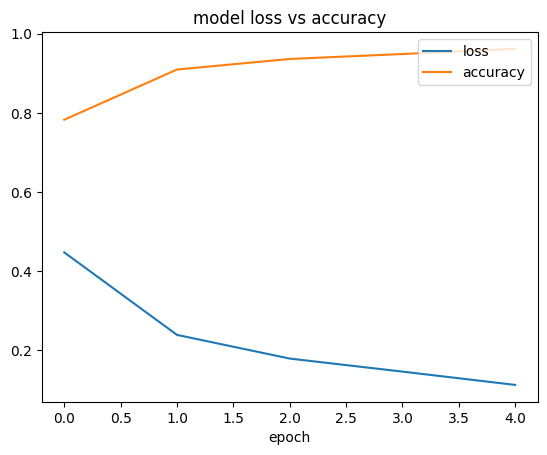

In [ ]:
from matplotlib import pyplot
pyplot.plot(history.history['loss'])
pyplot.plot(history.history['accuracy'])
pyplot.title('model loss vs accuracy')
pyplot.xlabel('epoch')
pyplot.legend(['loss', 'accuracy'], loc='upper right')
pyplot.show()